In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Read the CSV file using pandas
df = pd.read_csv('/content/drive/My Drive/data/starting_data.csv')
df_test = pd.read_csv('/content/drive/My Drive/data/starting_data_test.csv')

# Now you can work with the DataFrame 'df'
print(df.head(10))

Mounted at /content/drive
                                                text  y
0  http://www.autocarnet.gr/2012/12/2_23.html *#*...  0
1  http://www.queen.gr/love-laugh-live/story/1275...  5
2  http://www.aggeliorama.gr/exoplismos-epixeiris...  5
3  http://www.bikerspoint.gr/index.php?option=com...  0
4  http://www.athensgo.gr/%ce%bf%ce%b9-%ce%b3%cf%...  3
5  http://www.angelopouloshair.gr/%ce%ba%ce%b1%cf...  8
6  http://kafeneio-gr.blogspot.gr/2016/09/home.ht...  3
7  http://www.onalert.gr/stories/ekpaidefsi-iraki...  3
8  http://kraxtis-gr.blogspot.gr/2013/08/h.html *...  5
9  http://www.oaed.gr/home?p_p_id=101&p_p_lifecyc...  4


# Preprocess

In [3]:
import unicodedata

def strip_accents_and_lowercase(s):
   return ''.join(c for c in unicodedata.normalize('NFD', s)
                  if unicodedata.category(c) != 'Mn').lower()

accented_string = "Εισαι χαζούλης βρε?"
unaccented_string = strip_accents_and_lowercase(accented_string)

print(unaccented_string) # αυτη ειναι η ελληνικη εκδοση του bert.


εισαι χαζουλης βρε?


In [4]:
import re

def remove_numbers(text):
    # Use regular expression to remove all numbers
    return re.sub(r'\d+', '', text)


In [5]:
df.text = df.text.astype(str)
df.y = df.y.astype(int)

df_test.text = df_test.text.astype(str)

X_accent_strip = []
X_accent_strip_test = []

for sentence in df.text:
  sentence = remove_numbers(sentence)
  X_accent_strip.append(strip_accents_and_lowercase(sentence))

df.text = X_accent_strip

for sentence in df_test.text:
  sentence = remove_numbers(sentence)
  X_accent_strip_test.append(strip_accents_and_lowercase(sentence))

df_test.text = X_accent_strip_test


KeyboardInterrupt: 

In [ ]:
df.text[1]

'http://www.queen.gr/love-laugh-live/story//madwalk--intmshoes *#* νικολεττα ραλλη μας μεταφερει τις εμπειριες της απο το\n φωτογραφιες\nλιγο πριν την τηλεοπτικη προβολη της μεγαλης γιορτης της μοδας του θα ηθελα να μοιραστω μαζι σας εικονες και στιγμες οπως τις εζησα στο του φαντασμαγορικου αυτου\nπριν ξεκινησω την περιγραφη θα γυρισω λιγο τον χρονο πισω ηταν απριλιος του και εγω ανηκα στο δυναμικο του θυμαμαι λοιπον οτι ειχα μια προταση απο το καναλι για μια νεα εκπομπη οπου αντικειμενο της θα ηταν η μοδα και η μουσικη και πως εχουν επηρεαστει αμφοτερες με το περασμα των χρονων το ονομα αυτης θα ηταν μ και καποια στιγμη στοχος ηταν να γινει που θα θυμιζε τα αντιστοιχα της αμερικης η προβολη ξεκινησε και αρχικα ημουνα μονη με την στην συνεχεια την παρουσιαζα μαζι με την μαιρη συνατσακη με αποκορυφωμα φυσικα το πρωτο τον ιουνιο του ιδιου ετους με εμενα και την μαιρη να μεταδιδουμε απο το κοκκινο χαλι και στην συνεχεια τον παλμο του ηταν μια πολυ καλη και επιτυχημενη επαγγελματικη χρονι

Clean texts

In [ ]:
train_clean = []
for sent in df.text:

  sent = sent.replace("\n", " ")

  sent = re.sub(r'http\S+', '', sent)

  sent = sent.replace("nan", " ")

  sent = sent.replace("*#*", " ")

  sent = re.sub(r'[a-zA-Z]', ' ', sent)

  train_clean.append(sent)

test_clean = []
for sent in df_test.text:

  sent = sent.replace("\n", " ")

  sent = re.sub(r'http\S+', '', sent)

  sent = sent.replace("nan", " ")

  sent = sent.replace("*#*", "")

  sent = re.sub(r'[a-zA-Z]', ' ', sent)

  test_clean.append(sent)


Remove stop words and stem?

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
greek_stopwords = set(stopwords.words('greek'))

from snowballstemmer import stemmer
greek_stemmer = stemmer("greek")


def remove_stopwords(corpus):
  filtered_corpus = []

  for sent in corpus:

    # Tokenize the text
    tokens = nltk.word_tokenize(sent, language='greek')

    # Remove the stop words
    filtered_text = [greek_stemmer.stemWord(word) for word in tokens if word.lower() not in greek_stopwords]

    # Stemming
    # stemmed_text = [greek_stemmer.stemWord(word) for word in filtered_text]

    # Join the words back into a string
    joined_text = ' '.join(filtered_text)

    filtered_corpus.append(joined_text)

  return filtered_corpus


filtered_train = remove_stopwords(train_clean)
print("Train: ready")
filtered_test = remove_stopwords(test_clean)
print("Test: ready")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
filtered_test[9]

'τριτ μαρτ εννε περιεργ γερμανικ επιδοτησ φορολογουμεν ζητ καταργ οικονομ αρκετ εκατομμυρ ευρ προτειν κρατ γερμαν προυπολογ συλλογ γερμαν φορολογουμεν μελ οποι εψαξ βρ καποι παραξεν επιδοτησ μπορ οπωσ υποστηρ καταργ ωρ μ πολιτικ σωστ προτεραιοτητ δηλωσ προεδρ συνδεσμ συμφων εδωσ δημοσιοτητ τη λ στοχ υπαρξ χαμηλ φορολογικ επιβαρυνσ συμφων ερευν επιδοτησ εχ λογ διν εξ προωθησ εν λογισμ εσ σχεδιασμ επιδοτειτα εκατ ευρ σχεδον εκατομμυρι επιδοτησ φοιτητ αμβουργ αξιολογ διαπολιτισμ αντικειμεν παραδειγμ κινεζικ πορσελαν εν σουβλ αντιμετωπιστ καταστασ προσφυγ χρειαζ εργ λε συνδεσμ διν μελετ στοιχει επιδεινων τη γευσ τ μπιρ σχεδι προωθειτα μ γερμανικ μ σουηδικ εταιρει συνδεσμ διερωτ γιατ αναγκαζ πληρων φορολογουμεν χιλιαδ ευρ επιδοτησ προωθησ μι πρωτειν καν φθην τροφ ψαρ στισ ιχθυοκαλλιεργει συλλογ επικριν εργ γενικ γραμμ διερωτ ωστοσ γιατ υπουργει υποστηρ μον σχετ μεγαλ αναδυομεν οικονομι οπωσ ινδ κιν αιγυπτ ομοσπονδιακ υπουργει ερευν διν εκατ εκπαιδευσ τ εργαζομεν στ συγκεκριμεν αποτρεψ πιθαν

In [ ]:
final_train = pd.DataFrame()
final_train['text'] = filtered_train
final_train['y'] = df.y

final_test = pd.DataFrame()
final_test['text'] = filtered_test

In [ ]:
# To save as CSV
# final_train.to_csv('/content/drive/My Drive/predictions/stemmed_train.csv', index=False)
# final_test.to_csv('/content/drive/My Drive/predictions/stemmed_test.csv',index=False)

CHECKPOINT

In [7]:
final_train

,text,y
0,συμπληρωστ ερωτηματολογι αξιοπιστ αυτοκινητ σ ...,0
1,νικολεττ ραλλ μ μεταφερ εμπειρι τ φωτογραφι λι...,5
2,εξοπλ επιχειρησ πατρ αχαι ελλαδ πωλ α συνθετ σ...,5
3,προτειν εν φιλ ζελατιν καλαθ σ εχ κανεν προιον...,0
4,γυναικ ψηφ σημει στ οποι λατρευ αγγ κοινοποιησ...,3
...,...,...
1807,nan,2
1808,λειτουργ ετοιμαζ τεθ λιγ ημερ θεσ αγι νικολα δ...,3
1809,θεσ εργασι ευρωπαικ κεντρ αναπτυξ επαγγελματικ...,4
1810,εναρξ εργαστηρ γυναικολογικ νοσηλευτικ φροντιδ...,4


In [9]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

final_train = pd.read_csv('/content/drive/My Drive/predictions/stemmed_train.csv')
final_test = pd.read_csv('/content/drive/My Drive/predictions/stemmed_test.csv')

final_train.text = final_train.text.astype(str)
final_train.y = final_train.y.astype(int)

final_test.text = final_test.text.astype(str)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


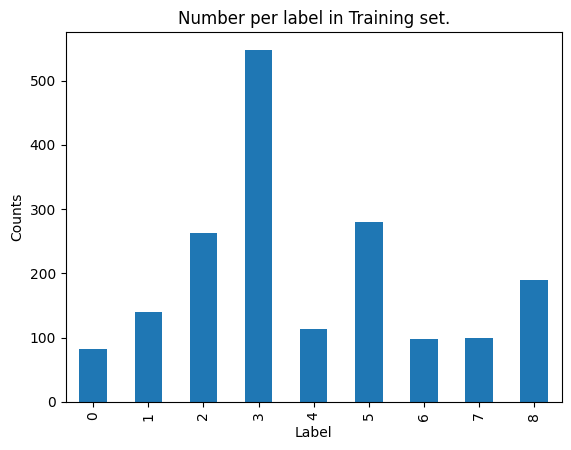

In [10]:
final_train.y.value_counts().sort_index().plot(kind="bar")
plt.title("Number per label in Training set.")
plt.xlabel("Label")
plt.ylabel("Counts")
plt.show()

UNDER SAMPLE

In [ ]:
# # Calculate desired sample size for each class
# desired_sample_size = 250 # Adjust as needed

# # Create a DataFrame for undersampled data
# undersampled_df = pd.DataFrame(columns=clean_train.columns)

# majority_classes = [3]
# minority_classes = [0,1,2,4,5,6,7,8]

# # Undersample majority classes
# for class_label in majority_classes:
#     # Select samples equal to desired sample size randomly
#     undersampled_subset = clean_train[clean_train.y == class_label].sample(desired_sample_size, random_state=1311)
#     # Append to the undersampled DataFrame
#     undersampled_df = pd.concat([undersampled_df, undersampled_subset], ignore_index=True)

# # Include all samples from minority classes
# for class_label in minority_classes:
#     minority_subset = clean_train[clean_train.y == class_label]
#     undersampled_df = pd.concat([undersampled_df, minority_subset], ignore_index=True)

# # Shuffle the undersampled DataFrame
# undersampled_df = undersampled_df.sample(frac=1, random_state=1311).reset_index(drop=True)
# undersampled_df.text = undersampled_df.text.astype(str)
# undersampled_df.y = undersampled_df.y.astype(int)
# undersampled_df.shape
# # undersampled_df = clean_train

# Training

In [11]:
# cross-entropy loss for multi-class classification
def multiclass_cross_entropy(y_true, y_pred_prob):
    epsilon = 1e-15  # small value to prevent log(0)
    # clip predicted probabilities to avoid log(0)
    y_pred_prob = np.clip(y_pred_prob, epsilon, 1 - epsilon)
    # compute cross-entropy loss
    loss = -np.mean(np.sum(y_true * np.log(y_pred_prob), axis=1))
    return loss

In [20]:
from sklearn.model_selection import train_test_split

# x_train, y_train = final_train.text, final_train.y
# Splitting the data into training and testing sets
x_train, x_val, y_train, y_val = train_test_split(final_train.text, final_train.y, test_size=0.2, random_state=42)

In [21]:
# Convert categorical variable into dummy/indicator variables (one-hot encoding)
one_hot_yval = pd.get_dummies(y_val)
one_hot_yval = one_hot_yval.astype(int)

print(one_hot_yval)

      0  1  2  3  4  5  6  7  8
1605  0  0  0  1  0  0  0  0  0
707   0  0  0  0  0  0  1  0  0
1791  0  1  0  0  0  0  0  0  0
1631  0  0  0  0  0  1  0  0  0
916   0  0  0  1  0  0  0  0  0
...  .. .. .. .. .. .. .. .. ..
422   0  0  0  0  0  0  0  1  0
486   0  0  0  0  0  0  0  1  0
300   0  0  1  0  0  0  0  0  0
1699  0  0  0  0  0  0  0  1  0
420   0  0  0  0  1  0  0  0  0

[363 rows x 9 columns]


In [27]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Initialize a TF-IDF vectorizer with custom tokenization settings
vectorizer = TfidfVectorizer(
    # ngram_range=(3, 5),            # 📏 Specify the range of n-grams (3 to 5)
    # lowercase=False,              # 🔠 Keep the original case of the text
    # sublinear_tf=True,            # 📈 Apply sublinear term frequency scaling
    analyzer='word',              # 📖 Analyze based on word-level tokens
    # tokenizer=dummy,              # 🤖 Use the dummy function for custom tokenization
    # preprocessor=dummy,           # 🤖 Use the dummy function for custom preprocessing
    # token_pattern=None,           # 🧩 Use the dummy function for token pattern
    # strip_accents='unicode'       # 🌐 Strip accents using Unicode normalization
    max_features = 5000
)

# Fit the TF-IDF vectorizer on the tokenized texts of the test data
vectorizer.fit(final_test.text)

# Getting the vocabulary from the fitted vectorizer
vocab = vectorizer.vocabulary_


In [28]:
tf = TfidfVectorizer(strip_accents='unicode',vocabulary=vocab, max_features=5000)

tf.fit(x_train)
X_tfidf = tf.transform(x_train)

x_val_tfidf = tf.transform(x_val)

x_test_tfidf = tf.transform(final_test.text)

In [29]:
feature_names = tf.get_feature_names_out()

# Compute TF-IDF scores for each term
tfidf_scores = X_tfidf.max(0).toarray()[0]

# Create a dictionary mapping feature names to TF-IDF scores
feature_tfidf_scores = dict(zip(feature_names, tfidf_scores))

# Sort the features by TF-IDF score in descending order
sorted_features = sorted(feature_tfidf_scores.items(), key=lambda x: x[1], reverse=True)

# Select the top 10 features
top_features = sorted_features[:10]

print("Top 10 features:")
for feature, score in top_features:
    print(f"{feature}: {score}")

Top 10 features:
nan: 1.0
μα: 1.0
νο: 0.9357248071312729
ραλλ: 0.863102952853763
αεκ: 0.8351475616720042
περιγραφ: 0.8309916285628102
προγνωσ: 0.8240661389462415
κλικ: 0.8137196232028656
πριν: 0.8135719899919269
μαλλ: 0.8089854711992764


DIMENSIONAL REDUCTION

In [ ]:
# from sklearn.decomposition import TruncatedSVD

# svd = TruncatedSVD(n_components=1000)
# svd.fit(X_tfidf)
# svd_train = svd.transform(X_tfidf)
# svd_val = svd.transform(x_val_tfidf)

from sklearn.decomposition import NMF

nmf_model = NMF(n_components=1000)
nmf_train = nmf_model.fit_transform(X_tfidf)
nmf_val = nmf_model.transform(x_val_tfidf)

KeyboardInterrupt: 

NAIVE BAYES

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics


param_grid = {
    'alpha': [0.02, 0.05, 0.1, 0.2, 0.5, 1.0, 1.5, 2.0],
}

grid_nb = GridSearchCV(MultinomialNB(), param_grid, cv=5, refit = True, verbose = 1)
grid_nb = grid_nb.fit(nmf_train,y_train)

predicted = grid_nb.best_estimator_.predict(nmf_val)
print("Classification report for %s:\n%s\n" % (grid_nb.best_estimator_, metrics.classification_report(y_val, predicted)))

predicted_proba = grid_nb.best_estimator_.predict_proba(nmf_val)
print("Log-loss: ", multiclass_cross_entropy(one_hot_yval, predicted_proba))

Fitting 5 folds for each of 1 candidates, totalling 5 fits


ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py", line 776, in fit
    self._count(X, Y)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py", line 898, in _count
    check_non_negative(X, "MultinomialNB (input X)")
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 1418, in check_non_negative
    raise ValueError("Negative values in data passed to %s" % whom)
ValueError: Negative values in data passed to MultinomialNB (input X)


In [ ]:
np.min(svd_train)

-0.3779525167132437

LOGISTIC REGRESSION

In [ ]:
from sklearn.utils import class_weight

# Assuming X_train and y_train are your training data and labels
# Calculate class weights
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
weights_dict = {i: class_weights[i] for i in range(len(class_weights))}
# model = LogisticRegression(class_weight=weights_dict)
weights_dict

{0: 2.4552845528455283,
 1: 1.438095238095238,
 2: 0.7655259822560203,
 3: 0.36739659367396593,
 4: 1.7817109144542773,
 5: 0.719047619047619,
 6: 2.054421768707483,
 7: 2.0336700336700337,
 8: 1.0652557319223985}

In [ ]:
from sklearn.linear_model import LogisticRegression

param_grid = {"C":np.logspace(-3,3,7), "penalty":["l2"], "solver":['liblinear']}# l1 lasso l2 ridge
grid_clf = GridSearchCV(LogisticRegression(), param_grid, cv=5, refit = True, verbose = 1)
grid_clf = grid_clf.fit(svd_train,y_train)

predicted = grid_clf.best_estimator_.predict(svd_val)
print("Classification report for %s:\n%s\n" % (grid_clf.best_estimator_, metrics.classification_report(y_val, predicted)))

predicted_proba = grid_clf.best_estimator_.predict_proba(svd_val)
print("Log-loss: ", multiclass_cross_entropy(one_hot_yval, predicted_proba))

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Classification report for LogisticRegression(C=10.0, solver='liblinear'):
              precision    recall  f1-score   support

           0       1.00      0.79      0.88        19
           1       0.82      0.61      0.70        23
           2       0.54      0.53      0.53        40
           3       0.59      0.88      0.70       119
           4       0.80      0.70      0.74        23
           5       0.53      0.47      0.50        53
           6       0.55      0.29      0.37        21
           7       1.00      0.44      0.62        27
           8       0.91      0.55      0.69        38

    accuracy                           0.65       363
   macro avg       0.75      0.58      0.64       363
weighted avg       0.69      0.65      0.64       363


Log-loss:  1.0446228291694393


COMBINE

In [ ]:
predicted_proba = (grid_clf.predict_proba(x_val_tfidf) + grid_nb.best_estimator_.predict_proba(x_val_tfidf))/2

print("Classification report for %s:\n%s\n" % (grid_clf, metrics.classification_report(y_val, (np.argmax(predicted_proba, axis =-1)))))

print("Log-loss: ", multiclass_cross_entropy(one_hot_yval, predicted_proba))

Classification report for GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l2'], 'solver': ['liblinear']},
             verbose=1):
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.94      0.70      0.80        23
           2       0.81      0.85      0.83        40
           3       0.67      0.95      0.78       119
           4       0.86      0.78      0.82        23
           5       0.91      0.57      0.70        53
           6       0.94      0.76      0.84        21
           7       1.00      0.59      0.74        27
           8       0.93      0.74      0.82        38

    accuracy                           0.80       363
   macro avg       0.90      0.76      0.81       363
weighted avg       0.83      0.80      0.79       363


Log-loss:  0.61405644770089

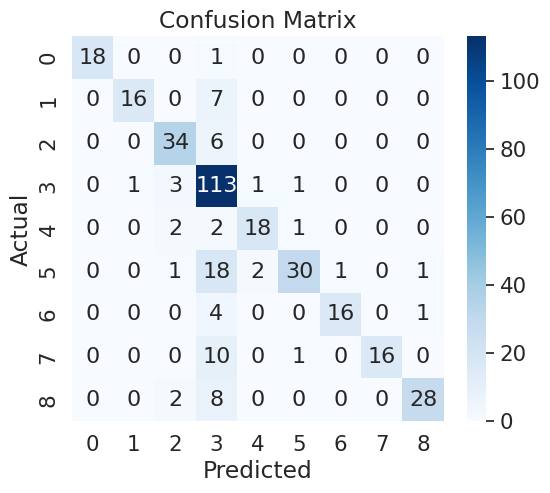

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm = confusion_matrix(y_val, (np.argmax(predicted_proba, axis =-1)))

plt.figure(figsize=(6, 5))
sns.set(font_scale=1.4) # Adjust font size
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Display the plot
plt.show()

In [ ]:
# import xgboost as xgb

# param_grid = {
#     'max_depth': [3,6],
#     'learning_rate': [0.01, 0.001],
#     'n_estimators': [10]
# }

# xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=9)

# grid_xgb = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, refit = True, cv=5, verbose=2)
# grid_xgb.fit(X_tfidf,y_train)

# predicted = grid_xgb.best_estimator_.predict(x_val_tfidf)
# print("Classification report for %s:\n%s\n" % (grid_xgb.best_estimator_, metrics.classification_report(y_val, predicted)))

# predicted_proba = grid_xgb.best_estimator_.predict_proba(x_val_tfidf)
# print("Log-loss: ", multiclass_cross_entropy(one_hot_yval, predicted_proba))

In [ ]:
test_preds = (grid_nb.best_estimator_.predict_proba(x_test_tfidf) + grid_clf.predict_proba(x_test_tfidf))/2

In [ ]:
test_domains = ['startupper.gr',
 'artware.gr',
 'oneirokritis.blogspot.gr',
 'kali-ellada.blogspot.gr',
 'ote.gr',
 'enimerosi24.gr',
 'fytro.com.gr',
 'amfiklia.gr',
 'toeidesauto.blogspot.gr',
 'a-special-edition.blogspot.gr',
 'sport-plus.gr',
 'tripadvisor.com.gr',
 'fanpage.gr',
 'foodoopro.gr',
 'xe.gr',
 'airtickets.gr',
 'networkdynamics.gr',
 'eap.gr',
 'anekdotakiastv.blogspot.gr',
 'prpanagiotopoulos.blogspot.gr',
 'cinemaclub.gr',
 'seisaxthia.blogspot.gr',
 'adecco.gr',
 'marketingweek.gr',
 'zougla.gr',
 'freegossip.gr',
 'ant1news.gr',
 'oneirokritis.gr',
 'onscreen.net.gr',
 'epirusgate.blogspot.gr',
 'mykonosdaily.gr',
 'pharmasofia.gr',
 'neoiorizontes.gr',
 'mylefkada.gr',
 'net360.gr',
 'ypakp.gr',
 'freddonews.gr',
 'figame.gr',
 'irafina.gr',
 'skroutz.gr',
 'tralala.gr',
 'newmoney.gr',
 'farmerama.gr',
 'korinthiakoi-orizontes.blogspot.gr',
 'safecase.gr',
 'otakustore.gr',
 'greekaffiliates.gr',
 'froyros.blogspot.gr',
 'invitromagazine.gr',
 'cretalive.gr',
 'patratora.gr',
 'kithiraikanea.blogspot.gr',
 'prismaradio.gr',
 'trikalaenimerosi.gr',
 'thessaliatv.gr',
 'medicalland.gr',
 '4troxoi.gr',
 'ballmaske.gr',
 'techit.gr',
 'paixnidia-stratigikis.gr',
 'powerforce.gr',
 'agrinioculture.gr',
 'ergonblog.gr',
 'golden-greece.gr',
 'youropia.gr',
 'esos.gr',
 'banksnews.gr',
 'karditsapress.gr',
 'neo.edu.gr',
 'fsa.gr',
 'ghz.gr',
 'fe-mail.gr',
 'the-walking-dead-greek-fanatics.blogspot.gr',
 'koyzoylo.gr',
 'keramidi-valtou.blogspot.gr',
 'greek-inews.gr',
 'infotime.gr',
 'lifehack.gr',
 'upatras.gr',
 'vouliwatch.gr',
 'kiosterakis.gr',
 'freemail.gr',
 'aetos-grevena.blogspot.gr',
 'a-sports.gr',
 'sofokleous10.gr',
 'diorismos.gr',
 'nickelodeon.gr',
 '10000paixnidia.gr',
 'metafysiko.gr',
 'katerinionline.gr',
 'uop.gr',
 'portes-asfaleias.gr',
 'oliviart-gr.blogspot.gr',
 'gr.gov.gr',
 'topnews24.gr',
 'pierikialithia.gr',
 'onpc.gr',
 'tameteora.gr',
 'efimerida-sporades.blogspot.gr',
 'arkadiapress.gr',
 'eviabest.gr',
 'scienceandtechnology.gr',
 'bestnews.gr',
 'audi.gr',
 'loveradio.gr',
 'parapolitika.gr',
 'avgi.gr',
 'nextlevelgroup.gr',
 '902.gr',
 'runnermagazine.gr',
 'lamiafm1.gr',
 'parianostypos.gr',
 'rocking.gr',
 'bet-dream.blogspot.gr',
 'emy.gr',
 'dimitriskazakis.blogspot.gr',
 'ivf-embryo.gr',
 'techblog.gr',
 'agrolaiki.gr',
 'on-news.gr',
 'careernet.gr',
 'greenmood.gr',
 'stoxos.gr',
 'web-greece.gr',
 'jobigator.gr',
 'saver.gr',
 'eduguide.gr',
 'gnto.gr',
 'thesout.gr',
 'aegaio.blogspot.gr',
 'akouseto.gr',
 'gonis.gr',
 'joytv.gr',
 'problogger.gr',
 'kalimera-arkadia.blogspot.gr',
 'hotel-chris.gr',
 'ktelxanthis.gr',
 'iatropedia.gr',
 'studiolefkatas.gr',
 'paidikoparty.gr',
 'lemonbook.gr',
 'athlodromos.blogspot.gr',
 'fomo.gr',
 'ti-einai.gr',
 'innews.gr',
 'santair.gr',
 'imerodromos.gr',
 'thessalonikiartsandculture.gr',
 'sete.gr',
 'ae-dikaioubc.gr',
 '310.gr',
 'ruberkon.gr',
 'nektarios.com.gr',
 'ipse.gr',
 'pillowfights.gr',
 'clickmedia.gr',
 'wraia.gr',
 'onsports.gr',
 'freemeteo.gr',
 'kalimera-arkadia.gr',
 'familypharmacy.gr',
 'e-kaisariani.gr',
 'ilaliatisroumelis.blogspot.gr',
 'artonweb.gr',
 'musicheaven.gr',
 'sportdrama.gr',
 'korinthostv.gr',
 'tosokaki.blogspot.gr',
 'proteon.gr',
 'kris-karras.gr',
 'ellak.gr',
 'myastro.gr',
 'adiexodos.blogspot.gr',
 'ski.gr',
 'thrakitoday.gr',
 'myphone.gr',
 'naousanews.gr',
 'vickytoxotis.blogspot.gr',
 'topnews.gr',
 'kosmoslarissa.gr',
 'jotis.gr',
 'dealnews.gr',
 'gr.gr',
 'noa.com.gr',
 'pitsirikos.blogspot.gr',
 'pestaola.gr',
 'paron.gr',
 'jokestream.blogspot.gr',
 'tuned.gr',
 'naxostimes.gr',
 'prevezanews.gr',
 'patrastimes.gr',
 'learningevolution.gr',
 'triklopodia.gr',
 'alouette.gr',
 'aegeanews.gr',
 'animalplanet.gr',
 'hua.gr',
 'prlogos.gr',
 'digitallife.gr',
 'ilioupoligiaolous.gr',
 'kolotoubes.blogspot.gr',
 'web-parrot.blogspot.gr',
 'grizosgatos.blogspot.gr',
 'nekthl.blogspot.gr',
 'downtimeforyou.blogspot.gr',
 'proklitiko.gr',
 'militaire.gr',
 'biscotto.gr',
 'sintagesgiaantres.gr',
 'vrisko.gr',
 'nakas.edu.gr',
 'autohire-chania.gr',
 'pancarshop.gr',
 'redumbrella.gr',
 'lolmoms.gr',
 'alexandreia-gidas.gr',
 'psichogios.gr',
 'spy727.gr',
 'fimotro.gr',
 'press-gr.blogspot.gr',
 'brainfood.gr',
 'staratalogia.blogspot.gr',
 'veriotis.gr',
 'sela.gr',
 'prohoster.gr',
 'oichalianews.gr',
 'bloggertips.gr',
 'thrakisports.blogspot.gr',
 'digital-artworks.gr',
 'parapona-rodou.gr',
 'protinews.gr',
 'evros24.gr',
 'wdesign.gr',
 'pharm24.gr',
 'pamebouzoukia.gr',
 'visit-pilio.gr',
 'lymberopoulos-lab.gr',
 'ikusi.gr',
 'greekpress.gr',
 'kerkyra.gr',
 'emprosnet.gr',
 'leoforos.gr',
 'tornosnews.gr',
 'kerdiseto.blogspot.gr',
 'trikalain.gr',
 'weplayball.gr',
 'asteiatoras.gr',
 'appleteam.gr',
 'design.com.gr',
 'visibility.gr',
 'tech4greece.gr',
 'eap.edu.gr',
 'batterypro.gr',
 'dancce.gr',
 'hotelamaryllis.gr',
 'polis-agora.blogspot.gr',
 'xespao.blogspot.gr',
 'anek.gr',
 'lixoudiesmarifanis.blogspot.gr',
 'fightsports.gr',
 'ebiskoto.gr',
 'perialos.blogspot.gr',
 'taxheaven.gr',
 'cinemode.gr',
 'trainose.gr',
 '007pcservice.gr',
 'fanaripress.gr',
 'e-diseis.gr',
 'away.gr',
 'travelstyle.gr',
 'andronikou.gr',
 'psarema.gr',
 'thessports.gr',
 'katohika.gr',
 'paoshop.gr',
 'athensvoice.gr',
 'angrybet.gr',
 'fmgreece.gr',
 'elawyer.blogspot.gr',
 'iskra.gr',
 'dietnet.gr',
 'tinosvoice.gr',
 'pharmnet.gr',
 'cookshop.gr',
 'top-sport.gr',
 'kavalanews.gr',
 'aray.gr',
 'gnto.gov.gr',
 'athenslab.gr',
 'dou.gr',
 'logotexnikesmikrografies.blogspot.gr',
 'kosinfo.gr',
 'zizel.gr',
 'epithimies.gr',
 'wedia.gr',
 'fightclubgalatsi.gr',
 'eeeek.gr',
 'vita4you.gr',
 'myorasis.gr',
 '2810.gr',
 'sportrikala.gr',
 'ipedia.gr',
 'daily-stories.gr',
 '24wro.com.gr',
 'left.gr',
 'xanthinea.gr',
 'sosiatroi.gr',
 'thessalianews.gr',
 'fitness-sport.gr',
 'mag24.gr',
 'goneisonline.gr',
 'politischios.gr',
 'travelpass.gr',
 'erevnhths.blogspot.gr',
 'ebooks4greeks.gr',
 'epiruspost.gr',
 'liberal.gr',
 'paokbc.gr',
 'rethymno.gr',
 'ifarsala.gr',
 'toperiodiko.gr',
 'fresh-education.blogspot.gr',
 'carnmotion.gr',
 'zodia123.gr',
 'trikalaola.blogspot.gr',
 '78-45.gr',
 'sahiel.gr',
 'freelancer.gr',
 'sailingboats.gr',
 'kathigitopolis.gr',
 'pointer.gr',
 'meteo.gr',
 'techfrog.gr',
 'aristonbts.gr',
 'mystudentpass.gr',
 'mythiki-anazitisi.blogspot.gr',
 'newsdiet.gr',
 'pharmacyonlineshop.gr',
 '4step.gr',
 'babyspace.gr',
 'report24.gr',
 'parakritika.gr',
 'ired.gr',
 'eudoxus.gr',
 'greekrowers.blogspot.gr',
 'unfollow.com.gr',
 'opinionpost.gr',
 'patakis.gr',
 'med-xrays.gr',
 'gamosdiorganosi.gr',
 'oneirokriths-oneira.gr',
 'newsorama.gr',
 'antikry.gr',
 'pocket-guide.gr',
 'taxydromos.gr',
 'inkefalonia.gr',
 'autoscoop.gr',
 'gourmed.gr',
 'freepen.gr',
 'sakisrouvas.gr',
 'parisk.gr',
 'aftofotos.blogspot.gr',
 'xronos.gr',
 'smsbox.gr',
 'ypodomes.blogspot.gr',
 'e-diet.gr',
 'goseminars.gr',
 'defenceline.gr',
 'hxostyle.gr',
 'infoserres.gr',
 'hadjidakis.gr',
 'soulouposeto.blogspot.gr',
 'arnos.gr',
 'pianoteacher.gr',
 'stinplatia.gr',
 'typologos.blogspot.gr',
 'infowoman.gr',
 'edromos.gr',
 'elderbet.blogspot.gr',
 'koinos--nous.blogspot.gr',
 'fannatics.gr',
 'manslife.gr',
 'atromitistas.gr',
 'ischool.gr',
 'e-pontos.gr',
 'naxios.blogspot.gr',
 'stoxasmos-politikh.blogspot.gr',
 'viotiashop.blogspot.gr',
 'serresparatiritis.gr',
 'top-nea.blogspot.gr',
 'techne.gr',
 '24oresimathia.gr',
 'totalskin.gr',
 'ermionigreece.blogspot.gr',
 'vivanews.gr',
 'clopyandpaste.blogspot.gr',
 'anagnostirio.gr',
 'greatfood.gr',
 'ofis66.blogspot.gr',
 'delikaris-sport.gr',
 'ygeianet.gr',
 'piperies.gr',
 'kotsadoros.gr',
 'mixanitouxronou.gr',
 'vitaraclub.gr',
 'homecorner.gr',
 'dikaiologitika.blogspot.gr',
 'kouzoulo.blogspot.gr',
 'freerider.gr',
 'semifind.gr',
 'elastika-mitoglou.gr',
 'hotelscombined.gr',
 'automarin.gr',
 'parakato.gr',
 'diastixo.gr',
 'teiep.gr',
 'kathimerini.gr',
 'segas.gr',
 'uom.gr',
 'doctv.gr',
 'xespao.gr',
 'bluestarferries.gr',
 'xronometro.blogspot.gr',
 'svouranews.blogspot.gr',
 'ert.gr',
 'nafpaktianews.gr',
 'secnews.gr',
 'imagine897.gr',
 'alfavita.gr',
 'exipno.gr',
 'asfalistroulis.blogspot.gr',
 'my-shop.gr',
 'edu4adults.blogspot.gr',
 'usay.gr',
 'paidikaicinema.blogspot.gr',
 'pamekonstantinoupoli.gr',
 'basketforum.gr',
 'aquaexterior.gr',
 'healthreport.gr',
 'iviskospublications.gr',
 'ilovemyseries.blogspot.gr',
 'stinplatia.blogspot.gr',
 'patrasnews.gr',
 'e-karystos.gr',
 'e-peristeri.gr',
 'epirusblog.gr',
 'viva.gr',
 'infokids.gr',
 'paintmycar.gr',
 'mantinades.gr',
 'skaikairos.gr',
 'kalogritsasinsurance.gr',
 'poki.gr',
 'lamianow.gr',
 'funday.gr',
 'qenglish.gr',
 'xorisorianews.gr',
 'papaki.gr',
 'sinidisi.gr',
 'crashonline.gr',
 'tromaktiko.gr',
 'hostdog.gr',
 'sch.gr',
 'ellada-russia.gr',
 'kefalonianews.gr',
 'dietup.gr',
 'sentragoal.gr',
 'melodia.gr',
 'naxos.gr',
 'translatum.gr',
 'antifono.gr',
 'prasinoforos.gr',
 'star.gr',
 'ad24.gr',
 'epikaira.gr',
 'samostimes.gr',
 'athensdeejay.gr',
 'apodoxi.gr',
 'youpharmacy.gr',
 'saltandsugar.gr',
 'anexartitos.gr',
 'thesstoday.gr',
 'e-crochet.blogspot.gr',
 'service-iphone.gr',
 'argolikeseidhseis.gr',
 'fullhd.gr',
 'joinradio.gr',
 'livanis.gr',
 'proderm.gr',
 'beautycorner.gr',
 'money-tourism.gr',
 'filonoi.gr',
 'deasy.gr',
 'el.gr',
 'designed.gr',
 'eosagriniou.gr',
 'diadoseto.gr',
 'e-didaskalia.blogspot.gr',
 'panteion.gr',
 'aluminium.gr',
 'kranosgr.blogspot.gr',
 'elora.gr',
 'eimaimama.blogspot.gr',
 'pharmacy4u.gr',
 'achaianews.gr',
 'maradclub.blogspot.gr',
 'eviazoom.blogspot.gr',
 'psmedical.gr',
 'stoplekto.gr',
 'multi-news.gr',
 'epspierias.gr',
 'rebike-art.gr',
 'modernmoms.gr',
 'goof.gr',
 'kollintzas.gr',
 'cycladesvoice.gr',
 'morethanawoman.gr',
 'ekivolos.gr',
 'hysteria.gr',
 'govastileto.gr',
 'mastrantonis-istiofora.gr',
 '123tv.gr',
 'globaledu.gr',
 'dermadvance.gr',
 'proinoslogosnews.gr',
 'greekaffair.gr',
 'kavala-portal.gr',
 'exomatiakaivlepo.blogspot.gr',
 'tsotilion.blogspot.gr',
 'sibilla-gr-sibilla.blogspot.gr',
 'culture.gr',
 'imode.gr',
 'megatv.gr',
 'ioannidismanolis.blogspot.gr',
 'energ.gr',
 'odigosxanthis.gr',
 'efenpress.gr',
 'hyperhosting.gr',
 'dytikanea.gr',
 'avatonpress.gr',
 'ebooks4greeks.blogspot.gr',
 'geogeo.gr',
 'rentacarlesvos.gr',
 'zoornalistas.blogspot.gr',
 'lavriaki.gr',
 'busted.gr',
 'cip.gr',
 'fimotro.blogspot.gr',
 'netplanet.gr',
 'tvxs.gr',
 'autopower.gr',
 'proslipsis.gr',
 'tospitakimou.gr',
 'newsblog.gr',
 'zappit.gr',
 'allyou.gr',
 'autotriti.gr',
 'filmboy.gr',
 'cineramen.blogspot.gr',
 'monopoli.gr',
 'autocity.gr',
 'carwall.gr',
 'texnitesonline.gr',
 'creationweb.gr',
 'smashsport.gr',
 'cretetv.gr',
 'oasth.gr',
 'techsmart.gr',
 'ballistic.gr',
 'maresei.gr',
 'lesvosnews.gr',
 'koutipandoras.gr',
 'benaki.gr',
 'megalopoli.blogspot.gr',
 'tax-analysis.blogspot.gr',
 'lenshop.gr',
 'villaoasis.gr',
 'padma.gr',
 'we24.gr',
 'hydra.gr',
 'museum-hotel.gr',
 'oneclickpharmacy.gr',
 'travelchat.gr',
 'secretmust.gr',
 'orthomedicare.gr',
 'enews24.gr',
 'deltanews.gr',
 'e-iatroi.gr',
 'proininews.gr',
 'myportal.gr',
 'radiokalloni.gr',
 'neraidokiklos.gr',
 'gorgoneskaimages.gr',
 'proinanea.gr',
 'anytime.gr',
 'taexeiola.gr',
 'milostravel.gr',
 'michanikos.gr',
 'ellinikahoaxes.blogspot.gr',
 'rise.gr',
 'relaxstrom.gr',
 'airliners.gr',
 'palema.gr',
 'protagon.gr']

In [ ]:
import csv

# Write predictions to a file
with open('/content/drive/My Drive/predictions/predictions_7.csv', 'w') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    lst = list()
    for i in range(9):
        lst.append('class_'+str(i))
    lst.insert(0, "domain_name")
    writer.writerow(lst)
    for i,test_host in enumerate(test_domains):
        lst = test_preds[i].tolist()
        lst.insert(0, test_host)
        writer.writerow(lst)

# TRIALS


-> tfidf, min_df=10,max_df=50, MultinomialNB(), undersample only class 3 to 300 examples. (TEST 1.5)

STEMMER AND STOPWORDS OUT, NO UNDERSAMPLE
* tfidf, min_df=10,max_df=50, MultinomialNB(), undersample only class 3 to 300 examples 1.27
* tfidf max_features 10000, MultinomialNB(alpha=0.02) 1.21, logistic 1.35 no undersample | 5000 features 1.2 NB | 1000,1500 worse
* ensemble NB, clf with 5000 features val cross entropy 1.13.

UNDERSAMPLE CLASSES
Doesnt seem to improve the results.

-> tfidf max_features=5000, Ensemble: 0.8*MultinomialNB(0.02) + 0.2*Logistic, No undersample (TEST 2.9) WOW! (overfitting or bug)

-> Strip accents, remove numbers, remove links, \n, nan, english,*#*. Max features 5000 with vocab, Ensemble MultinomianNB- Logistic 50-50. (TEST 1.44)

-> + remove stop words (TEST 1.2)

-> + stemming (TEST 1.15)


In [ ]:
import os
import pandas as pd
import numpy as np
import shutil
import sys
import tqdm.notebook as tq
from collections import defaultdict

import torch
import torch.nn as nn

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(device)

cpu


In [ ]:
#Reproducing same results
SEED = 1311

#Torch
torch.manual_seed(SEED)

#Cuda algorithms
torch.backends.cudnn.deterministic = True

In [ ]:
from sklearn.model_selection import train_test_split
# split into train and test
df_train, df_valid = train_test_split(df, random_state=77, test_size=0.20, shuffle=True)

In [ ]:
# Hyperparameters
MAX_LEN = 96
TRAIN_BATCH_SIZE = 32
VALID_BATCH_SIZE = 32
TEST_BATCH_SIZE = 32
EPOCHS = 10
LEARNING_RATE = 1e-05

In [ ]:
from transformers import AutoTokenizer, AutoModel

tokenizer = AutoTokenizer.from_pretrained("nlpaueb/bert-base-greek-uncased-v1")
model = AutoModel.from_pretrained("nlpaueb/bert-base-greek-uncased-v1")

In [ ]:
df_train.text[0]

'http://www.autocarnet.gr///_.html *#*συμπληρωστε το ερωτηματολογιο για την αξιοπιστια του αυτοκινητου σας\nειδησεις\nπαραδοθηκε στην κυκλοφορια το τμημα παραδεισια τσακωνα του αυτοκινητοδρομου κορινθος καλαματα\nτελος μπαινει στην ταλαιπωρια των οδηγων μετακινουνταν απο και προς την καλαματα μεσω παραδεισιων μετα την παραδοση στην κυκλοφορια του τμηματος της εθνικης οδου τριπολης καλαματας στην περιοχη της τσακωνας το οποιο παρεμεινε κλειστο εδω και χρονια λογω εργων\nθα υπαρχει μονο μια μικρη\nπαρακαμψη στο σημειο κατασκευης της μεγαλης γεφυρας οπου βυθιζοταν ο δρομος ο χρονος της διαδρομης αθηνα καλαματα χλμ θα μειωθει περιπου κατα τριαντα λεπτα στις ωρες απο ωρες και λεπτα που ειναι σημερα\nμε την παραδοση του τμηματος παραδεισια τσακωνα αποδιδονται σε πληρη κυκλοφορια και οι ανισοπεδοι κομβοι παραδεισιων και κυπαρισσιας καθως και το τμημα απο την τσακωνα μεχρι τον ανισοπεδο κομβο κυπαρισσιας που κατασκευαστηκαν στο πλαισιο της συμβασης παραχωρησης του αυτοκινητοδρομου κορινθος τρι

In [ ]:
from transformers import BertTokenizer

# Function for the tokenization
def tokenize_text(data, tokenizer, max_length=MAX_LEN):
    return tokenizer(data, padding='max_length',
                     max_length=max_length, truncation=True, return_tensors='pt')

bert_train = tokenize_text(df_train.text[0], tokenizer)
bert_val = tokenize_text(df_valid.text, tokenizer)
# bert_test = tokenize_text(X_test_final, bert_tokenizer)


bert_train

ValueError: text input must be of type `str` (single example), `List[str]` (batch or single pretokenized example) or `List[List[str]]` (batch of pretokenized examples).

In [ ]:
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, df, tokenizer, max_len, target_list):
        self.tokenizer = tokenizer
        self.df = df
        self.title = list(df['text'])
        self.targets = self.df['y'].values
        self.max_len = max_len

    def __len__(self):
        return len(self.title)

    def __getitem__(self, index):
        title = str(self.title[index])
        title = " ".join(title.split())
        inputs = self.tokenizer.encode_plus(
            title,
            None,
            add_special_tokens=True,
            max_length=self.max_len,
            padding='max_length',
            return_token_type_ids=True,
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )
        return {
            'input_ids': inputs['input_ids'].flatten(),
            'attention_mask': inputs['attention_mask'].flatten(),
            'token_type_ids': inputs["token_type_ids"].flatten(),
            'targets': torch.FloatTensor(self.targets[index])
        }

In [ ]:
train_dataset = CustomDataset(df_train, tokenizer, MAX_LEN,  ["1","2"])
valid_dataset = CustomDataset(df_valid, tokenizer, MAX_LEN, ["1","2"])

In [ ]:
# testing the dataset
next(iter(train_dataset))

{'input_ids': tensor([  101,  1635,   143,   122,   122, 19551, 16920, 24810,   121,   493,
           122,  2009,  2173,   122,   117,   110,   117,   784,  2657,   351,
          2207,   400,  3066, 18840,   261,  8555,  2243,   457,   353,   348,
           739,   355,   784,   358, 23247,   739,   364, 14326,  1635,   143,
           122,   122, 19551, 16920, 24810,   121,   493,   122,  2667,   122,
           122,   122,   112,   974,   112,   157,   112,   974,   112,   157,
           112,   974,   112,   157,   112,   974,   112,   157,   112,  2726,
           112,   112,   974,   112, 11760,   112,   974,   112,   157,   112,
          2726,   112,   112,   974,   112, 13532,   112,  2726,   112,   158,
           112,  2726,   112,   120, 19551, 16920, 24810,   120,   112,   974,
           112,  9809,   112,  2726,   112,   112,  2726,   112,   112,   974,
           112,   157,   112,   974,   112,  3227,   112,   974,   112,  3603,
           120, 30322,   120,   112,   

In [ ]:
# Data loaders
train_data_loader = torch.utils.data.DataLoader(train_dataset,
    batch_size=TRAIN_BATCH_SIZE,
    shuffle=True,
    num_workers=0
)

val_data_loader = torch.utils.data.DataLoader(valid_dataset,
    batch_size=VALID_BATCH_SIZE,
    shuffle=False,
    num_workers=0
)


In [ ]:
class BERTClass(torch.nn.Module):
    def __init__(self):
        super(BERTClass, self).__init__()
        self.bert_model = model
        self.dropout = torch.nn.Dropout(0.3)
        self.linear = torch.nn.Linear(768, 8)

    def forward(self, input_ids, attn_mask, token_type_ids):
        output = self.bert_model(
            input_ids,
            attention_mask=attn_mask
        )
        output_dropout = self.dropout(output.pooler_output)
        output = self.linear(output_dropout)
        return output

model = BERTClass()

# # Freezing BERT layers: (tested, weaker convergence)
# for param in model.bert_model.parameters():
#     param.requires_grad = False

model.to(device)

BERTClass(
  (bert_model): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(35000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_a

In [ ]:
def loss_fn(outputs, targets):
    return torch.nn.BCEWithLogitsLoss()(outputs, targets)

from transformers import AdamW

# define the optimizer
optimizer = AdamW(model.parameters(), lr = 1e-5)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:

# Training of the model for one epoch
def train_model(training_loader, model, optimizer):

    losses = []
    correct_predictions = 0
    num_samples = 0
    # set model to training mode (activate droput, batch norm)
    model.train()
    # initialize the progress bar
    loop = tq.tqdm(enumerate(training_loader), total=len(training_loader),
                      leave=True, colour='steelblue')
    for batch_idx, data in loop:
        ids = data['input_ids'].to(device, dtype = torch.long)
        mask = data['attention_mask'].to(device, dtype = torch.long)
        token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
        targets = data['targets'].to(device, dtype = torch.float)

        # forward
        outputs = model(ids, mask, token_type_ids) # (batch,predict)=(32,8)
        loss = loss_fn(outputs, targets)
        losses.append(loss.item())
        # training accuracy
        _, preds = torch.max(outputs, dim=1) # batch dim
        _, targ = torch.max(targets, dim=1)  # batch dim
        num_samples += len(targ)  # technically adding batch size
        correct_predictions += torch.sum(preds == targ)

        # backward
        optimizer.zero_grad()
        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        # grad descent step
        optimizer.step()

        # Update progress bar
        #loop.set_description(f"")
        #loop.set_postfix(batch_loss=loss)

    # returning: trained model, model accuracy, mean loss
    return model, float(correct_predictions)/num_samples, np.mean(losses)

In [ ]:
def eval_model(validation_loader, model, optimizer):
    losses = []
    correct_predictions = 0
    num_samples = 0
    # set model to eval mode (turn off dropout, fix batch norm)
    model.eval()

    with torch.no_grad():
        for batch_idx, data in enumerate(validation_loader, 0):
            ids = data['input_ids'].to(device, dtype = torch.long)
            mask = data['attention_mask'].to(device, dtype = torch.long)
            token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
            targets = data['targets'].to(device, dtype = torch.float)
            outputs = model(ids, mask, token_type_ids)

            loss = loss_fn(outputs, targets)
            losses.append(loss.item())

            # validation accuracy
            _, preds = torch.max(outputs, dim=1) # batch dim
            _, targ = torch.max(targets, dim=1)  # batch dim
            num_samples += len(targ)  # technically adding batch size
            correct_predictions += torch.sum(preds == targ)

    return float(correct_predictions)/num_samples, np.mean(losses)

In [ ]:
history = defaultdict(list)
best_accuracy = 0

for epoch in range(1, 1+1):
    print(f'Epoch {epoch}/{EPOCHS}')
    model, train_acc, train_loss = train_model(train_data_loader, model, optimizer)
    val_acc, val_loss = eval_model(val_data_loader, model, optimizer)

    print(f'train_loss={train_loss:.4f}, val_loss={val_loss:.4f} train_acc={train_acc:.4f}, val_acc={val_acc:.4f}')

    history['train_acc'].append(train_acc)
    history['train_loss'].append(train_loss)
    history['val_acc'].append(val_acc)
    history['val_loss'].append(val_loss)
    # save the best model
    if val_acc > best_accuracy:
        torch.save(model.state_dict(), os.path.join(data_dir,"output","best_model_state.bin"))
        best_accuracy = val_acc

Epoch 1/10


  0%|          | 0/46 [00:00<?, ?it/s]